<a href="https://colab.research.google.com/github/shrikantkute/Practice/blob/main/Hotel_Booking_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
## <b>Explore and analyze the data to discover important factors that govern the bookings.

# Importing Data

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Data
path= '/content/drive/MyDrive/AlmaBetter/EDA Capston Project/'
original_df=pd.read_csv(path + 'Hotel Bookings.csv')

# Intial investigation on Dataframe

In [4]:
# Making a copy of raw file to work upon to make sure raw file is intact
hotel_df=original_df.copy()

In [5]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Check the datatypes
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# Check statastical aspects of the data
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Now just take a look at the unique values of each column in the dataframe.


In [8]:
print(hotel_df['hotel'].unique())

['Resort Hotel' 'City Hotel']


There are two types of hotels
* Resort Hotel 
* City hotel

In [9]:
print(hotel_df['is_canceled'].unique())

[0 1]


This column predicts
* Booking cancelled = 1  
* Booking not cancelled = 0

In [10]:
print(hotel_df['lead_time'].unique())

[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 141 189 187 223 284 214 202 211 16

* The column **Lead Time** predicts the time difference between guest books their room and the time they are scheduled to arrive at the hotel.

In [11]:
print(hotel_df['arrival_date_year'].unique())

[2015 2016 2017]


* **arrival_date_year** is year of arrival of the guest.

In [12]:
print(hotel_df['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


* **arrival_date_month** is month of arrival of the guest.

In [13]:
print(hotel_df['arrival_date_week_number'].unique())

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]


* **arrival_date_week_number** is weak of arrival of the guest.

In [14]:
print(hotel_df['meal'].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


Meal type - 
*  **BB** : Bed and Breakfast
*  **HB** : Half Board (Breakfast and Dinner normally)
*  **FB** : Full Board (Beakfast, Lunch and Dinner)
*  **SC** : Self-catering
* **Undefined** : Rooms only packages without meals.










In [15]:
print(hotel_df['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


* **arrival_date_week_number** is weak of arrival of the guest.

In [16]:
print(hotel_df['market_segment'].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


**Market segment** 
This provides source of information through which customer booked
* **TA** - "Travel Agent"
* **TO** - "Tour operators"
* **Direct** -"Direct booking

In [17]:
print(hotel_df['distribution_channel'].unique())

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


**Distribution Channel** 
* We provides source of information through which customer booked
* **TA/TO** -Travel Agent/Tour operators
* **Direct** -Direct booking
* **Corporate** -Corporate booking

In [18]:
print(hotel_df['is_repeated_guest'].unique())

[0 1]


**Guests are new or old**
* **1** - Old guest
* **0** - New  guest

In [19]:
print(hotel_df['reserved_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [20]:
print(hotel_df['assigned_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [21]:
print(hotel_df['booking_changes'].unique())

[ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]


In [22]:
print(hotel_df['deposit_type'].unique())

['No Deposit' 'Refundable' 'Non Refund']


In [23]:
print(hotel_df['company'].unique())

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

In [24]:
print(hotel_df['agent'].unique())

[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  45. 

In [25]:
print(hotel_df['days_in_waiting_list'].unique())

[  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]


In [26]:
print(hotel_df['customer_type'].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


**This column predicts**
* **Transient**
* **Transient-Party**
* **Group**
* **Contract**

In [27]:
print(hotel_df['adr'].unique())

[  0.    75.    98.   ... 266.75 209.25 157.71]


In [28]:
print(hotel_df['required_car_parking_spaces'].unique())

[0 1 2 8 3]


In [29]:
print(hotel_df['total_of_special_requests'].unique())

[0 1 3 2 4 5]


In [30]:
print(hotel_df['reservation_status'].unique())

['Check-Out' 'Canceled' 'No-Show']


**This column predicts**
* **Check-Out**
* **Canceled**
* **No-Show**

# Cleaning the Data

**Step 1: Removing Duplicates and unnecessary values**

In [31]:
# Checking for duplicates
duplicate_rows=hotel_df[hotel_df.duplicated()]
duplicate_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [32]:
duplicate_rows.shape
print('Number of duplicated rows are:',duplicate_rows.shape)

Number of duplicated rows are: (31994, 32)


In [33]:
# Droping the duplicated rows
hotel_df=hotel_df.drop_duplicates()
hotel_df.shape

(87396, 32)

**Step 2: Handling Missing Values**

In [34]:
# Checking null values
hotel_df.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [35]:
# As we can clearly see that there are null values in column :
# company                           82137
# agent                             12193
# country                             452
# children                              4

In [36]:
# ASSUMPTIONS TAKEN
# 452 null values in country can be taken  as "others"
# Column children have very less null values so droping them would not affect the analysis
# Column company,agent have very high number of null values and assigning 0 to all the null values in column

In [37]:
# Assigning null values in column country as 'others'.
hotel_df['country'].fillna('others',inplace=True)

In [38]:
# Checking if there is still any null value present in column country.
hotel_df['country'].isna().sum()

0

In [39]:
# Dropping null values in column 'children'
hotel_df = hotel_df.dropna(axis=0, subset=['children'])
hotel_df['children'].isna().sum()

0

In [40]:
# Filling null values of column comapny and agent with value 0
hotel_df['agent'] = hotel_df['agent'].fillna(0,axis=0)
hotel_df['company'] = hotel_df['company'].fillna(0,axis=0)

<ipython-input-40-6ef568df2fba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['agent'] = hotel_df['agent'].fillna(0,axis=0)
<ipython-input-40-6ef568df2fba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['company'] = hotel_df['company'].fillna(0,axis=0)


In [41]:
# Checking dataframe again to check if there are any null values present or not
hotel_df.count()

hotel                             87392
is_canceled                       87392
lead_time                         87392
arrival_date_year                 87392
arrival_date_month                87392
arrival_date_week_number          87392
arrival_date_day_of_month         87392
stays_in_weekend_nights           87392
stays_in_week_nights              87392
adults                            87392
children                          87392
babies                            87392
meal                              87392
country                           87392
market_segment                    87392
distribution_channel              87392
is_repeated_guest                 87392
previous_cancellations            87392
previous_bookings_not_canceled    87392
reserved_room_type                87392
assigned_room_type                87392
booking_changes                   87392
deposit_type                      87392
agent                             87392
company                           87392


## <b>***Since, the data is cleaned. We can proceed with EDA***

# 1.Which hotel do most customers prefer ? 

In [42]:
# Checking most preferred hotel
most_prefered_hotel=hotel_df['hotel'].value_counts()
most_prefered_hotel

City Hotel      53424
Resort Hotel    33968
Name: hotel, dtype: int64

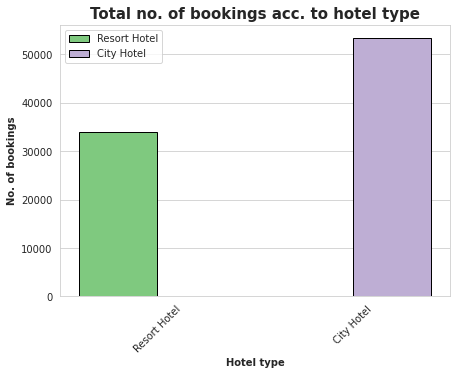

In [43]:
# Visualization in bar graph
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot(x='hotel',hue='hotel',data=hotel_df,palette='Accent',saturation=1,edgecolor='black')
plt.title('Total no. of bookings acc. to hotel type',weight='bold',size=15)
plt.xlabel('Hotel type',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('No. of bookings',weight='bold')
plt.legend(loc='upper left')

In [44]:
# Visualization in pie chart of percentage distribution of hotel
hotel_type_perecent_distribution=hotel_df['hotel'].value_counts(normalize=True)
hotel_type_perecent_distribution

City Hotel      0.611315
Resort Hotel    0.388685
Name: hotel, dtype: float64

Text(0, 0.5, 'City Hotel')

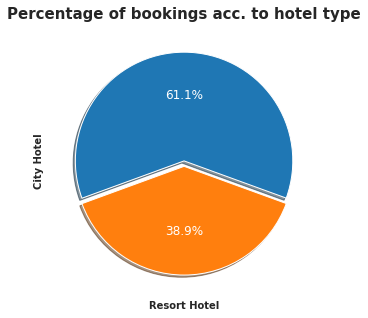

In [45]:
plt.figure(figsize=(7,5))
plt.pie(hotel_type_perecent_distribution,startangle=340,explode=(0,0.05),autopct='%1.1f%%' ,textprops={'color':"w",'fontsize':12},shadow=True)
plt.title('Percentage of bookings acc. to hotel type',weight='bold',size=15)
plt.xlabel('Resort Hotel',weight='bold')
plt.ylabel('City Hotel',weight='bold')

**Inference:** 
*   *It has been clear from both the graph that **City Hotel is preferred by most** of the customers and it contributes to **61.1% of the total booking made**.*

# 2.What months have the most reservations and the least ?

## *By Month*

In [46]:
# Ordering arrival month coloum to have correct sequence of month
month_in_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
hotel_df['arrival_date_month']=pd.Categorical(hotel_df['arrival_date_month'],categories=month_in_order,ordered=True)

In [47]:
# Finding peaking booking by month and hotel type using groupby 
peak_booking_month=hotel_df.groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
peak_booking_month
# or using pd.crosstab we can compare the two columns and get it in tabular form 
# peak_booking_month_another_way=pd.crosstab(hotel_df['arrival_date_month'],hotel_df['hotel'])
# peak_booking_month_another_way

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,2730,1963
February,3605,2493
March,4856,2657
April,5080,2828
May,5413,2942
June,5005,2760
July,5744,4313
August,6587,4666
September,4240,2450


Text(0.5, 33.0, 'Hotel Type')

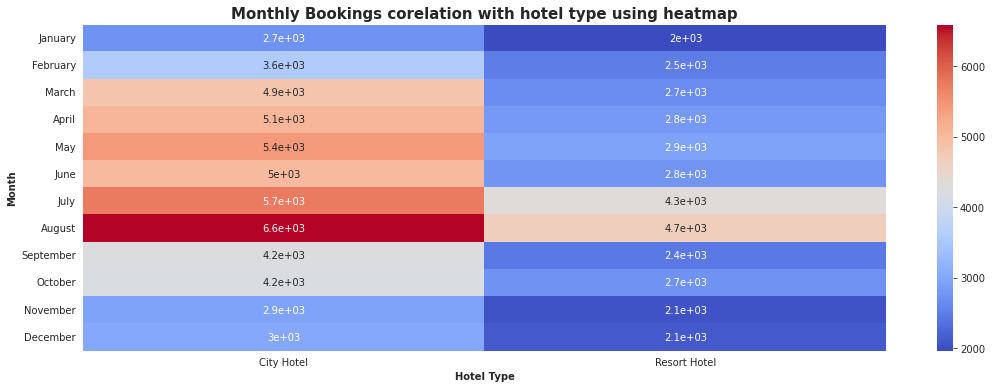

In [48]:
#Visualization:Heatmap 
plt.figure(figsize=(18,6))
sns.heatmap(peak_booking_month,cmap='coolwarm',annot=True)
plt.title('Monthly Bookings corelation with hotel type using heatmap',weight='bold',size=15)
plt.ylabel('Month',weight='bold')
plt.xlabel('Hotel Type',weight='bold')

* August month had peak bookings.

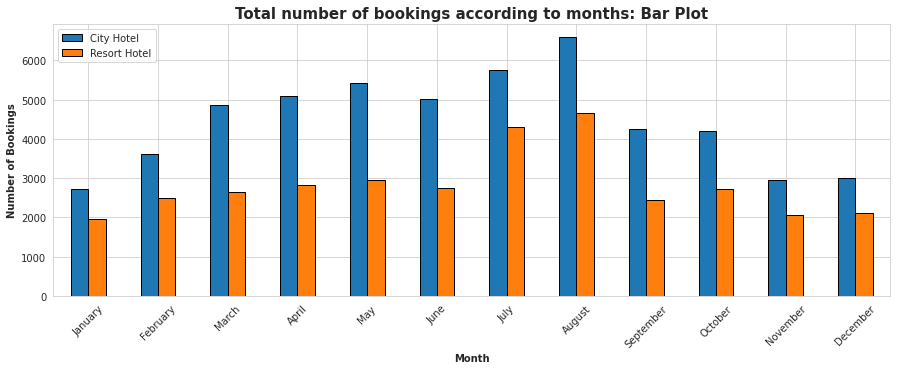

In [49]:
# Visualaization:Bar Chart
plt.rcParams['figure.figsize'] = (15,5)
peak_booking_month.plot(kind='bar',edgecolor='black',figsize=(15,5))
plt.title('Total number of bookings according to months: Bar Plot',weight='bold',size=15)
plt.xlabel('Month',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Bookings',weight='bold')
plt.legend(loc='upper left')

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


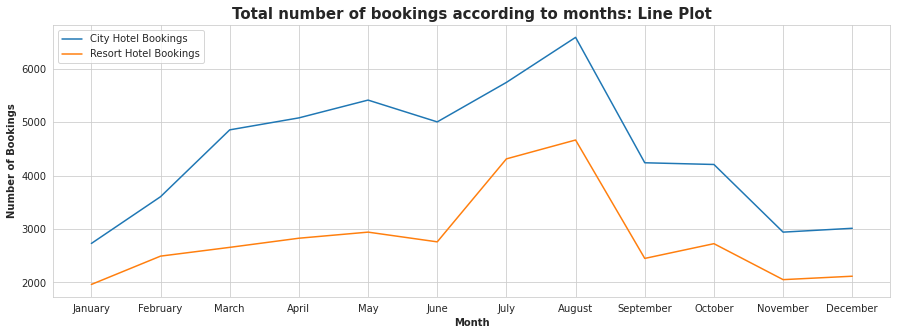

In [50]:
# Visualaization:Line Chart
plt.figure(figsize=(15,5))
plt.plot(peak_booking_month[['City Hotel']], label = 'City Hotel Bookings', linewidth=1.5)
plt.plot(peak_booking_month[['Resort Hotel']], label = 'Resort Hotel Bookings', linewidth=1.5)
plt.title('Total number of bookings according to months: Line Plot',weight='bold',fontsize=15)
plt.ylabel('Number of Bookings',weight='bold')
plt.xlabel('Month',weight='bold')
plt.legend(loc='upper left')

## *By Year*

In [51]:
# Trend in booking by year
booking_year_trend=hotel_df.groupby(['arrival_date_year','hotel'])['arrival_date_year'].count().unstack()
booking_year_trend

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,6546,6763
2016,26759,15632
2017,20119,11573


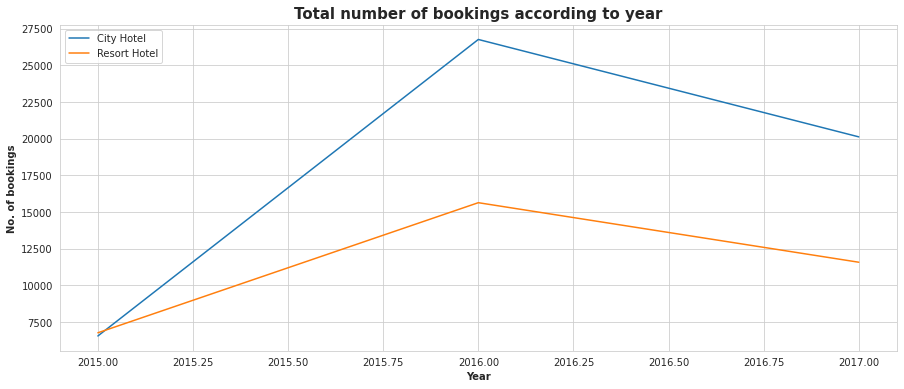

In [52]:
# Visualaization:Line Plot
booking_year_trend.plot(kind='line',figsize=(15,6))
plt.title('Total number of bookings according to year',fontsize=15,weight='bold')
plt.xlabel('Year',weight='bold')
plt.ylabel('No. of bookings',weight='bold')
plt.legend(loc='upper left')

**Inference:**

*   *From **March to August**, bookings **increased**, and **August** saw the **highest** number of bookings.*

*   *From the heatmap and bar chart above, It can be concluded that **August** is the **busiest month** for **both the hotels**, followed by July and May*.

*   *It is clear from the bar chart that in the City and Resort hotel, the **fewest** bookings occur during the months of **November, December and January**.*

*   *Bookings **surged** from **February to August**, although there was **dip** in **June**, and began to **decline after September**.*

*   *From the above line graph, it can be concluded that number of bookings **increased from year 2015 to 2016** and **started declining post year 2016**.*

**Note: For year 2017 only data up to August is available.**

# 3.What type of room do guests book the most? 

In [53]:
# Check how many types of rooms are provided through Hotels-
room_type_in_hotel = hotel_df['reserved_room_type'].unique()
print(f'Types of room in hotel are : {room_type_in_hotel}')

Types of room in hotel are : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [54]:
# Check which type of room is most preffered by the guest-
most_prefer_room = hotel_df['reserved_room_type'].value_counts().reset_index()
most_prefer_room.columns=['Room_type','Number_of_prefrence']
most_prefer_room

,Room_type,Number_of_prefrence
0,A,56552
1,D,17398
2,E,6049
3,F,2823
4,G,2052
5,B,995
6,C,915
7,H,596
8,L,6
9,P,6


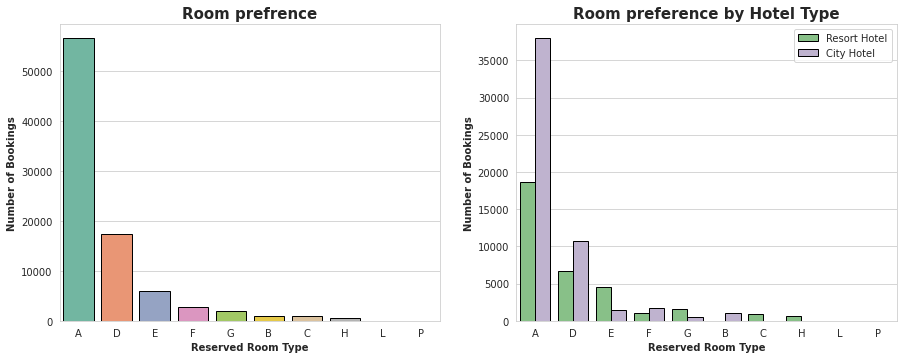

In [55]:
# Visualization: Bar chart
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
sns.barplot(x=most_prefer_room["Room_type"],y=most_prefer_room["Number_of_prefrence"],palette="Set2",edgecolor='black',linewidth=1)
plt.title("Room prefrence", weight='bold', fontsize=15)
plt.ylabel("Number of Bookings", weight='bold')
plt.xlabel("Reserved Room Type", weight='bold')


plt.subplot(2,2,2)
sns.countplot(x='reserved_room_type',data=hotel_df,order=hotel_df['reserved_room_type'].value_counts().index,hue='hotel',palette="Accent",edgecolor='black',linewidth=1)
plt.title('Room preference by Hotel Type',weight='bold',fontsize=15)
plt.xlabel('Reserved Room Type',weight='bold')
plt.ylabel('Number of Bookings',weight='bold')
plt.legend(loc='upper right')

**Inference:**

*   *Type **A** rooms were **most resreved** by the guest in both the hotels follwed by Type D,E,F,G rooms.* 



# 4.Which rooms are most often reassigned when guests arrive ?

## Overall

In [56]:
# Write a function to comapre the rooms in both columns
def get_same_type_room_assigned_or_not(a,b):
  '''This function will compare the two columns and will assign the o/p as Same Room Assigned or Different Room Assigned'''
  if a==b:
    return 'Same Room Assigned'
  else:
    return "Different Room Assigned"

In [57]:
# test the function get_same_type_room_assigned_or_not
get_same_type_room_assigned_or_not(hotel_df.iloc[0]['reserved_room_type'],hotel_df.iloc[0]['assigned_room_type'])

'Same Room Assigned'

In [58]:
# Create new column:room_reassigned_status using fucntion get_same_type_room_assigned_or_not
hotel_df['room_reassigned_status']=hotel_df.apply(lambda row:get_same_type_room_assigned_or_not(row['reserved_room_type'],
                                                                                     row['assigned_room_type']),axis=1)

In [59]:
#Overall change % data
room_change_percentage=hotel_df['room_reassigned_status'].value_counts(normalize=1).reset_index()
room_change_percentage.rename(columns={'index':'Room Change Status','room_reassigned_status':'%'},inplace=True)
room_change_percentage

,Room Change Status,%
0,Same Room Assigned,0.849998
1,Different Room Assigned,0.150002


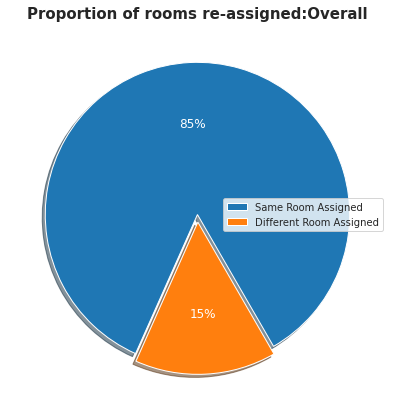

In [60]:
# Visualization
plt.figure(figsize=(7,7))
plt.pie(x='%',startangle=300,autopct='%1.0f%%' ,textprops={'color':"w",'fontsize':12},data=room_change_percentage,shadow=True,explode=(0,0.05))
plt.title('Proportion of rooms re-assigned:Overall',fontsize=15,weight='bold')
# OR # labels=['Same Room Assigned','Different Room Assigned	']
plt.legend(labels=room_change_percentage["Room Change Status"].value_counts().index,loc=('center right'))

In [ ]:
# Colnclusion: Overall ~15% room change was observed.

## *By Hotel Type*

In [61]:
room_change_percentage_by_hotel_type=hotel_df.groupby('hotel')['room_reassigned_status'].value_counts(normalize=1)
room_change_percentage_by_hotel_type

hotel         room_reassigned_status 
City Hotel    Same Room Assigned         0.885969
              Different Room Assigned    0.114031
Resort Hotel  Same Room Assigned         0.793423
              Different Room Assigned    0.206577
Name: room_reassigned_status, dtype: float64

In [62]:
# CITY HOTEL
room_change_percentage_for_city_hotel=room_change_percentage_by_hotel_type[0:2]
room_change_percentage_for_city_hotel

hotel       room_reassigned_status 
City Hotel  Same Room Assigned         0.885969
            Different Room Assigned    0.114031
Name: room_reassigned_status, dtype: float64

In [63]:
# RESORT HOTEL
room_change_percentage_for_resort_hotel=room_change_percentage_by_hotel_type[2:6]
room_change_percentage_for_resort_hotel

hotel         room_reassigned_status 
Resort Hotel  Same Room Assigned         0.793423
              Different Room Assigned    0.206577
Name: room_reassigned_status, dtype: float64

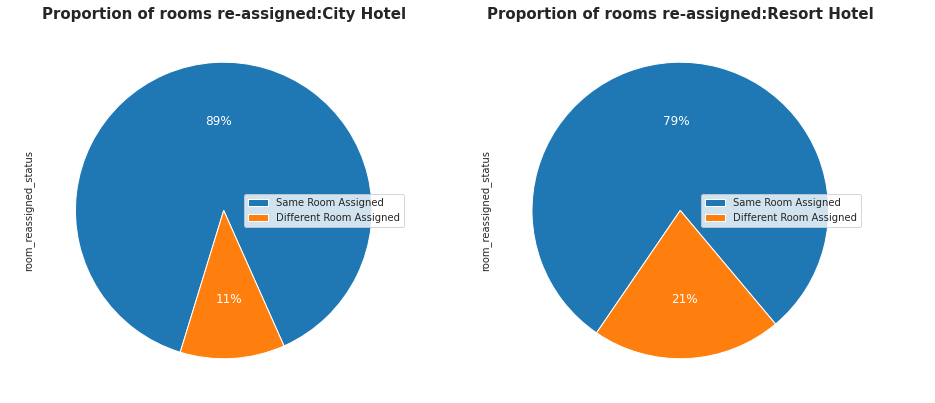

In [64]:
# Visualization
plt.figure(figsize=(15,15))

# City Hotel
plt.subplot(2,2,1)
room_change_percentage_for_city_hotel.plot(kind='pie',x='%',startangle=294,autopct='%1.0f%%' ,textprops={'color':"w",'fontsize':12})
plt.title('Proportion of rooms re-assigned:City Hotel',weight='bold',fontsize=15)
# Took the legend from the room_change_percentage["Room Change Status"]
plt.legend(labels=room_change_percentage["Room Change Status"].value_counts().index,loc=('center right'))

# City Hotel
plt.subplot(2,2,2)
room_change_percentage_for_resort_hotel.plot(kind='pie',x='%',startangle=310,autopct='%1.0f%%' ,textprops={'color':"w",'fontsize':12})
plt.title('Proportion of rooms re-assigned:Resort Hotel',weight='bold',fontsize=15)
# Took the legend from the room_change_percentage["Room Change Status"]
plt.legend(labels=room_change_percentage["Room Change Status"].value_counts().index,loc=('center right'))

In [ ]:
# City Hotel face 11% change in room in 3 years and 21% for Resort Hotel.

## *By Month*


In [65]:
room_change_by_month=hotel_df.groupby(['hotel','arrival_date_month'])['room_reassigned_status'].value_counts().unstack()
room_change_by_month


room_reassigned_status           Different Room Assigned  Same Room Assigned
hotel        arrival_date_month                                             
City Hotel   January                                 232                2498
             February                                418                3187
             March                                   583                4273
             April                                   495                4585
             May                                     542                4871
             June                                    443                4562
             July                                    516                5228
             August                                  607                5980
             September                               796                3444
             October                                 671                3537
             November                                413                2529
             December                                376                2638
Resort Hotel January                                 771                1192
             February                                760                1733
             March                                   689                1968
             April                                   568                2260
             May                                     570                2372
             June                                    344                2416
             July                                    489                3824
             August                                  467                4199
             September                               467                1983
             October                                 648                2078
             November                                646                1407
             December                                598                1519

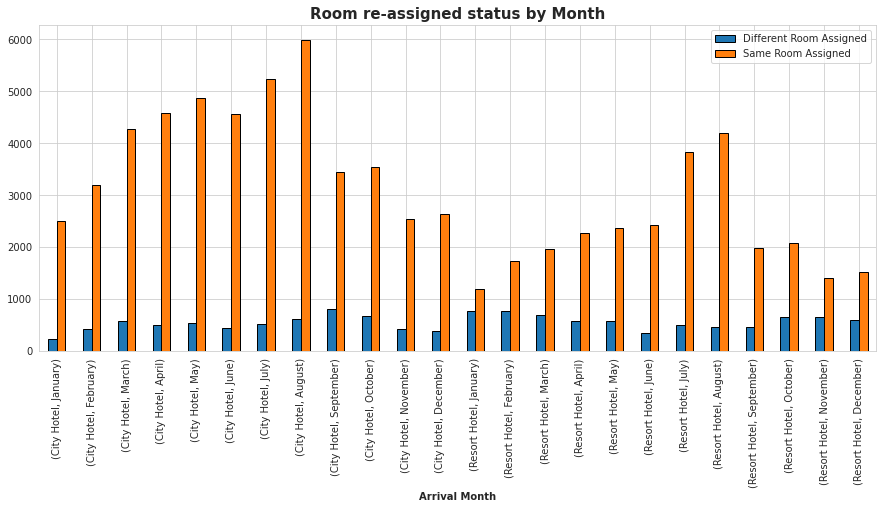

In [66]:
# Visualization
room_change_by_month.plot(kind='bar',edgecolor='black',figsize=(15,6))
plt.title('Room re-assigned status by Month',weight='bold',fontsize=15)
plt.xlabel('Arrival Month',weight='bold')
plt.legend(loc='upper right')

In [ ]:
# August was the month for City Hotel with highest room changes while for resort hotel it was the month of Janurary.

## *By Room Type*

In [67]:
# Most changes in which room type?
room_change_by_room_type=hotel_df[hotel_df['room_reassigned_status']=='Different Room Assigned'].groupby(['reserved_room_type'])['room_reassigned_status'].value_counts().unstack()
# Sort in descending order
room_change_by_room_type.sort_values('Different Room Assigned',ascending=False)

room_reassigned_status,Different Room Assigned
reserved_room_type,
A,10673
D,1414
E,587
F,187
B,125
G,53
C,48
H,17
L,5


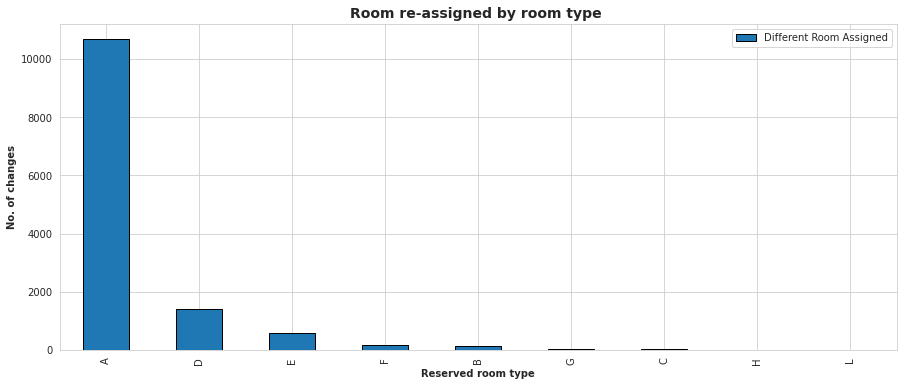

In [68]:
# Visualization
room_change_by_room_type.sort_values('Different Room Assigned',ascending=False).plot(kind='bar',edgecolor='black',figsize=(15,6))
plt.title('Room re-assigned by room type ',weight='bold',fontsize=14)
plt.xlabel('Reserved room type',weight='bold')
plt.ylabel('No. of changes',weight='bold')
plt.legend(loc='upper right')

In [ ]:
# Conclusion:Type A rooms were most subjected to room change follwed by D,E,F,B,C and negligible in H,L.

## Room type cancellation analysis

In [69]:
room_type_cancellation=hotel_df.groupby(['reserved_room_type','is_canceled'])['is_canceled'].count().unstack().reset_index()
room_type_cancellation.rename(columns={'is_canceled':'Index','reserved_room_type':'Reserved Room Type',0:'Not Cancelled',1:'Cancelled'},inplace=True)
room_type_cancellation

is_canceled,Reserved Room Type,Not Cancelled,Cancelled
0,A,41865.0,14687.0
1,B,681.0,314.0
2,C,619.0,296.0
3,D,12162.0,5236.0
4,E,4400.0,1649.0
5,F,1972.0,851.0
6,G,1315.0,737.0
7,H,353.0,243.0
8,L,4.0,2.0
9,P,NaN,6.0


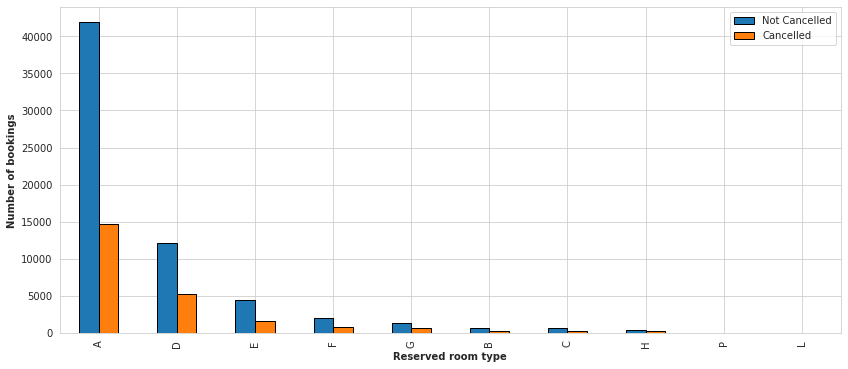

In [70]:
# Visualization
room_type_cancellation.sort_values(by='Cancelled',ascending=False).plot(x='Reserved Room Type',kind='bar',edgecolor='black',figsize=(14,6))
# plt.title('Most cancelled rom type',weight='bold',fontsize=15)
plt.xlabel('Reserved room type',weight='bold')
plt.ylabel('Number of bookings',weight='bold')
plt.legend(loc='upper right')

**Inference:**
*   *Over all  **~15% room change** was observed through out the year.*
*   *City Hotel face **11% room change** and Resort Hotel face **21% room change** through out the 3 years.*
*   *Highest number of changes in room were made in the month of the **Septemeber for City Hotel** and **Janurary for Resort Hotel**.*

*   *Type **A rooms are most susceptible to room shifting** followed by D, E, F, B, and C, and insignificant in H and L.*
 
*  *Analysis show that **Type A rooms are mostly cancelled** followed by D,E,F,G,B,C,H and negligible in P,L.*

# 5. Do your customers prefer weekdays or weekends?

## By Hotel Type

In [71]:
# Using groupby to create the desired dataframe
weekdays_weekends_df_by_hotel=hotel_df.groupby(['hotel']).agg({'stays_in_weekend_nights':'sum','stays_in_week_nights':'sum'})
weekdays_weekends_df_by_hotel

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,46595,121510
Resort Hotel,41258,107930


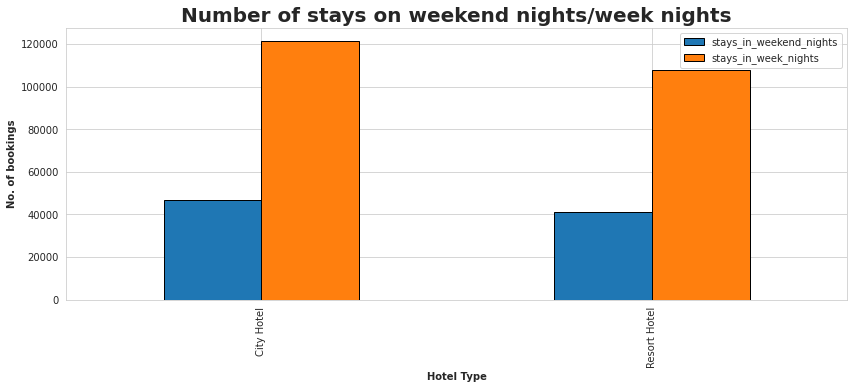

In [72]:
# Visualization
weekdays_weekends_df_by_hotel.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(14,5))
plt.title('Number of stays on weekend nights/week nights',weight='bold',fontsize='20')
plt.xlabel('Hotel Type',weight='bold')
plt.ylabel('No. of bookings',weight='bold')
plt.legend(loc='upper right')

In [ ]:
# customers prefer  to stay in week day nights the most other than weekends.

Inference:
*   *As we can see from the bar chart, guests prefer to **stay weeknights the most** at both hotels than weekend nights.*
*   *Guests prefer to stay in **City Hotel on weekends the most**.*

# 6.Top five country's tourist which made the bookings ?

In [73]:
# Check the top five countries from which guests are visiting most-
top_5_tourist_country= hotel_df["country"].value_counts().reset_index()[:5]
top_5_tourist_country.columns = ["country_name","number_of_guests"]
top_5_tourist_country

,country_name,number_of_guests
0,PRT,27449
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387


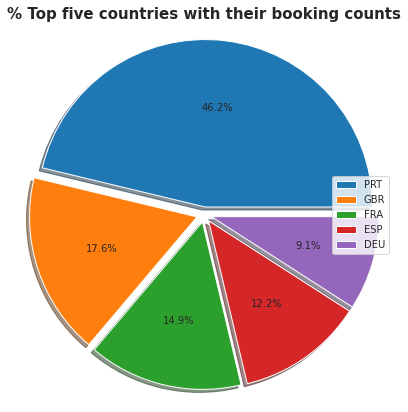

In [74]:
# Visualization in pie chart of percentage of top five countries which made the bookings in hotel
plt.figure(figsize=(7,7))
plt.pie(top_5_tourist_country["number_of_guests"],autopct="%1.1f%%",shadow=True,radius=1.1,explode=[.05]*5)
plt.legend(labels=top_5_tourist_country["country_name"].value_counts().index.tolist(),loc=('right'))
plt.title('% Top five countries with their booking counts', weight='bold',size=15)
plt.show()

In [ ]:
# Among top 5 countries around 46% bookings are from Portugal(PRT).

Text(0, 0.5, 'Booking Count')

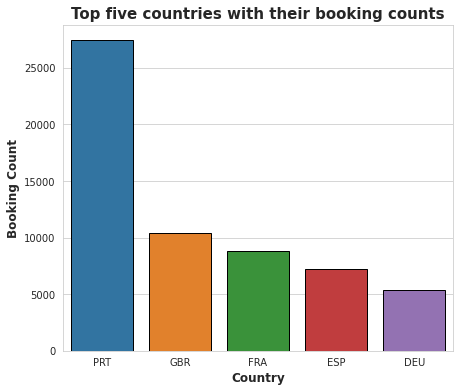

In [75]:
# Visualization in bar chart- Top five countries with their booking counts in hotel.

top_5_tourist_country = hotel_df.groupby('country')
top_5_tourist_country_df = pd.DataFrame(top_5_tourist_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:5]


plt.figure(figsize=(7,6))
sns.barplot(x = top_5_tourist_country_df['country'], y  = top_5_tourist_country_df['Count'],edgecolor='black')
plt.title("Top five countries with their booking counts", weight='bold', size=15)
plt.xlabel("Country", weight='bold', size=12)
plt.ylabel("Booking Count", weight='bold', size=12)

**Inference:**
*  **Portugal (PRT)** had the **highest number of travelers** who booked hotels, followed by the **United Kingdom (GBR), France (FRA), Spain (ESP) and Germany (DEU)**.

In [ ]:
**Inference:**
*  **Portugal (PRT)** had the **highest number of travelers** who booked hotels, followed by the **United Kingdom (GBR), France (FRA), Spain (ESP) and Germany (DEU)**.

In [ ]:
# Visualization in pie chart of percentage of top five countries which made the bookings in hotel
plt.figure(figsize=(7,7))
plt.pie(top_5_tourist_country["number_of_guests"],autopct="%1.1f%%",shadow=True,radius=1.1,explode=[.05]*5)
plt.legend(labels=top_5_tourist_country["country_name"].value_counts().index.tolist(),loc=('right'))
plt.title('% Top five countries with their booking counts', weight='bold',size=15)
plt.show()

In [ ]:
# Visualization in bar chart- Top five countries with their booking counts in hotel.

top_5_tourist_country = hotel_df.groupby('country')
top_5_tourist_country_df = pd.DataFrame(top_5_tourist_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:5]


plt.figure(figsize=(7,6))
sns.barplot(x = top_5_tourist_country_df['country'], y  = top_5_tourist_country_df['Count'],edgecolor='black')
plt.title("Top five countries with their booking counts", weight='bold', size=15)
plt.xlabel("Country", weight='bold', size=12)
plt.ylabel("Booking Count", weight='bold', size=12)